# Introduction to astropy and astroquery

### by Matt Craig, astropy core developer and (minor) contributor to astroquery

Astropy is both a Python package and an ecosystem of related packages meant to provide the nuts and bolts for doing astronomy with Python. It includes tools for representing **times** and **coordinates**, and for representing FITS files and data tables, along with tools to process those things. 

Astroquery is a part of the Astropy ecosystem which provides a consistent interface to a very wide range of data sources — things like Gaia, TESS, and Kepler data, as well as any data table in the Vizier system (including APASS DR9!). 

After a little bit about installation, we’ll do some short examples using both Astropy and Astroquery. All of the Python will be in Jupyter notebooks.

## Prep 0: Installing astropy and astroquery



+ Neither is an app that you download and install.
+ Instead, install Python, and then install astropy and astroquery
+ Python installation options (ideally only do one of these)
    + From [python.org/downloads](https://www.python.org/downloads/) (see AAVSO's guidance about how to do that)
    + Install [miniforge](https://github.com/conda-forge/miniforge#download) (which uses something called `conda` under the hood)
    + ❌ do not install the anaconda python distribution
+ Once Python is installed, learn about virtual environments, which come in two flavors (but do the same thing):
    + `venv` or `virtualenv` if you install from Python.org
    + `mamba` or `conda` if you install `miniforge`
    + ✅ ALWAYS WORK IN AN ENVIRONMENT 
+ Installing packages
    + Use `pip` to install packages, e.g. `pip install astropy astroquery astroplan astrowidgets stellarphot matplotlib jupyterlab`
    + If you install `miniforge`, you can use `mamba` insead, e.g. `mamba install astropy astroquery astroplan astrowidgets stellarphot matplotlib jupyterlab`
+ A couple of additional useful packages:
    + `jupyterlab` provides a nice browser-based way to run python
    + `matplotlib` is the most widely used plotting library in Python. 

## Prep 1: Open up a terminal/command prompt

Everything you do is going to start by typing commands in a terminal, ideally to start either `jupyter lab` or `ipython`

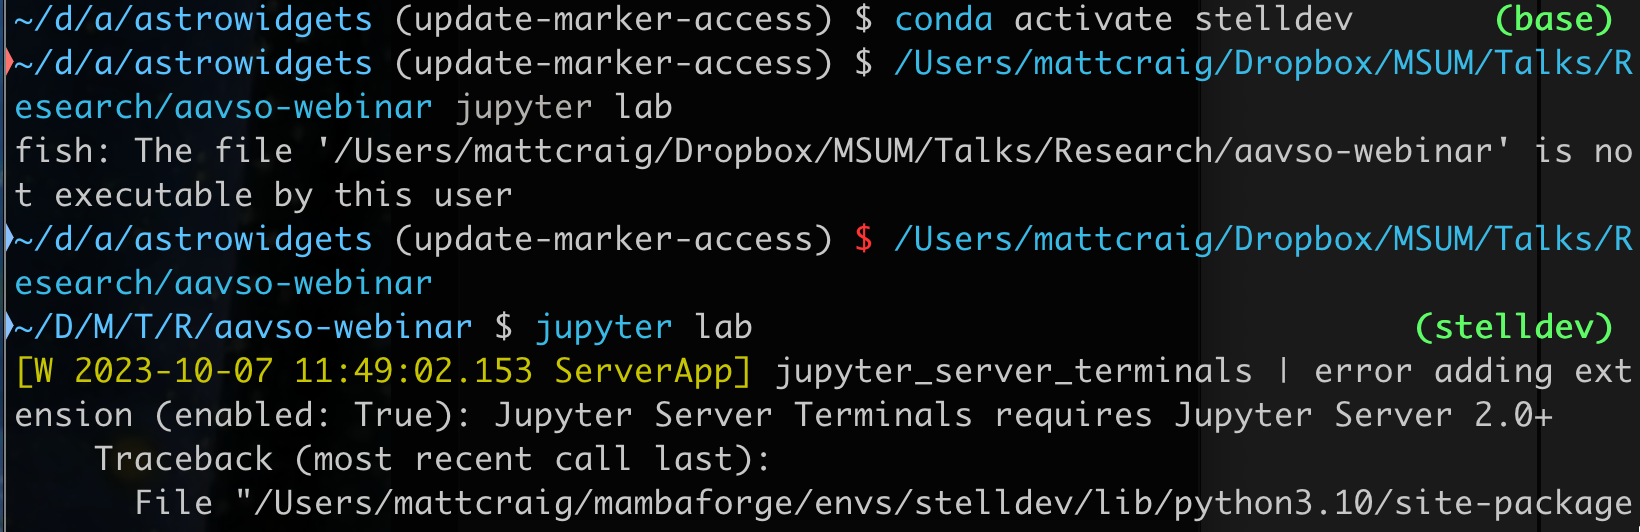

## Download the image used later in this notebook 

It isn't distributed with the notebook because it is sort of large (65MB)

In [96]:
from astropy.nddata import CCDData

ccd_for_saving = CCDData.read('http://physics.mnstate.edu/craig/ey-uma-S001-R001-C037-rp.fit.gz')
ccd_for_saving.write('ey-uma-S001-R001-C037-rp.fit', overwrite=True)

/Users/mattcraig/mambaforge/envs/stelldev/lib/python3.10/site-packages/astropy/wcs/wcs.py:489: FITSFixedWarning: RADECSYS= 'FK5 ' / Equatorial coordinate system 
the RADECSYS keyword is deprecated, use RADESYSa.
  wcsprm = _wcs.Wcsprm(header=header_bytes, key=key,


## Other notebooks used in the how-to

+ [Notebook for planning observations (elevation curves)](2023-09-01-planning-observations.ipynb): [2023-09-01-planning-observations](2023-09-01-planning-observations)
+ [Notebook for fetching comparison magnitudes from VSD and/or APASS magnitudes for VSD stars](get_apass_comp_mags.ipynb): [get_apass_comp_mags.ipynb](get_apass_comp_mags.ipynb)

## Some astropy basics: time and coordinates

In [22]:
from astropy.time import Time
from astropy.coordinates import SkyCoord

In [23]:
# create a time instance that represents now

time = Time("2023-10-07 18:13:00", scale="utc")

In [24]:
time

<Time object: scale='utc' format='iso' value=2023-10-07 18:13:00.000>

In [25]:
time.jd

2460225.2590277777

### Time scales and formats

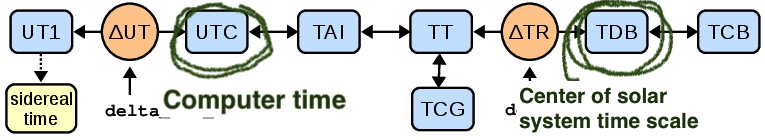

The (long) list of time formats is here: [https://docs.astropy.org/en/stable/time/index.html#time-format](https://docs.astropy.org/en/stable/time/index.html#time-format)

In [26]:
# Let's compare some of these times...
time, time.tai

(<Time object: scale='utc' format='iso' value=2023-10-07 18:13:00.000>,
 <Time object: scale='tai' format='iso' value=2023-10-07 18:13:37.000>)

In [27]:
time.tai, time.tt

(<Time object: scale='tai' format='iso' value=2023-10-07 18:13:37.000>,
 <Time object: scale='tt' format='iso' value=2023-10-07 18:14:09.184>)

In [74]:
time.ut1

<Time object: scale='ut1' format='iso' value=2023-10-07 18:13:00.014>

## Coordinates

Arguably, there are too many coordinate systems in astronomy: [https://docs.astropy.org/en/stable/coordinates/index.html#module-astropy.coordinates.builtin_frames](https://docs.astropy.org/en/stable/coordinates/index.html#module-astropy.coordinates.builtin_frames)

#### You can get coordinates from the name of an object (for many objects)

In [28]:
ey_uma = SkyCoord.from_name('ey uma')

In [29]:
ey_uma

<SkyCoord (ICRS): (ra, dec) in deg
    (135.58650087, 49.81921088)>

In [30]:
dh_uma = SkyCoord.from_name('dh uma')

In [31]:
dh_uma

<SkyCoord (ICRS): (ra, dec) in deg
    (135.81355559, 50.09427004)>

Angular separations are easy to calculate

In [32]:
ey_uma.separation(dh_uma)

<Angle 0.31144254 deg>

You can also work with arrays fo coordinates. We'll come back to that.

## Data structures/containers: CCDData and Table

In [33]:
from astropy.nddata import CCDData
image = CCDData.read('ey-uma-S001-R001-C037-rp.fit')

In [34]:
image.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
DATE-OBS= '2020-11-10T07:43:14' / ISO-8601 time of observation                  
EXPTIME =   9.00000000000E+001 / [sec] Duration of exposure                     
EXPOSURE=   9.00000000000E+001 / [sec] Duration of exposure                     
SET-TEMP=  -30.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -30.049470000000003 /CCD temperature at start of exposure in C       
XPIXSZ  =   9.0000000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   9.0000000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   

In [35]:
image.data

array([[-6.0973648e+04,  5.9699669e+01,  5.4754257e+01, ...,
         3.2724072e+01,  4.4615280e+01,  3.3036213e+01],
       [-2.0088574e+04,  5.8551609e+01,  7.9006386e+01, ...,
         3.0229141e+01,  4.5852444e+01,  4.7288322e+01],
       [ 1.4332782e+04,  5.7921307e+01,  6.2994690e+01, ...,
         3.9541603e+01,  5.5696468e+01,  4.3842388e+01],
       ...,
       [-2.1555604e+04,  3.5216190e+01,  2.7615276e+01, ...,
         3.0499826e+01,  3.0669968e+01,  3.6135483e+01],
       [ 4.0049723e+04,  5.0488937e+01,  3.2834229e+01, ...,
         4.3867901e+01,  4.6343338e+01,  4.3575451e+01],
       [ 1.3128194e+04,  4.1035675e+01,  3.3283875e+01, ...,
         3.6815483e+01,  4.7364788e+01,  4.1710548e+01]], dtype=float32)

In [75]:
image.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 135.583883082  49.8196424039  
CRPIX : 2055.0  2048.5  
PC1_1 PC1_2  : 0.000151823261591  -3.7623543859e-05  
PC2_1 PC2_2  : 3.75758294672e-05  0.000151799039659  
CDELT : 1.0  1.0  
NAXIS : 4096  4096

### How do I look at images?

[astrowidgets](https://astrowidgets.readthedocs.io/en/latest/install.html) builds on ipywidgets library to provide an in-browser interactivate image viewer. Expect some of its details to evolve over the next year.

[ginga](https://ginga.readthedocs.io/en/latest/) is an image viewing library that can use a bunch of ddifferent backends

In [82]:
# The correct import depends on what version of astrowidgets is installed,
# unfortunately.

try:
    from astrowidgets.ginga import ImageWidget
except ImportError:
    from astrowidgets import ImageWidget

Make the view

In [38]:
iw = ImageWidget()
iw

ImageWidget(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\x…

Load an image, option 1

In [39]:
iw.load_nddata(image)

/Users/mattcraig/mambaforge/envs/stelldev/lib/python3.10/site-packages/astropy/wcs/wcs.py:2721: AstropyWarning: Some non-standard WCS keywords were excluded: A_ORDER, A_0_2, A_1_1, A_2_0, B_ORDER, B_0_2, B_1_1, B_2_0, AP_ORDER, AP_0_0, AP_0_1, AP_0_2, AP_1_0, AP_1_1, AP_2_0, BP_ORDER, BP_0_0, BP_0_1, BP_0_2, BP_1_0, BP_1_1, BP_2_0 Use the ``relax`` kwarg to control this.
  warnings.warn(


If we hadn't already read in the file you can do this instead

In [84]:
iw.load_fits('ey-uma-S001-R001-C037-rp.fit')

/Users/mattcraig/mambaforge/envs/stelldev/lib/python3.10/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'TRIM_IMAGE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(
/Users/mattcraig/mambaforge/envs/stelldev/lib/python3.10/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'SUBTRACT_BIAS' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(
/Users/mattcraig/mambaforge/envs/stelldev/lib/python3.10/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'SUBTRACT_DARK' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(
/Users/mattcraig/mambaforge/envs/stelldev/lib/python3.10/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'FLAT_CORRECT' is greater than 8 ch

### Reading a table

[Astropy `Table` documentation](https://docs.astropy.org/en/stable/table/index.html)

In addition to CSV and FITS, `Table` recognizes several other formats.

In [40]:
from astropy.table import Table

In [41]:
ey_uma_data = Table.read('ey uma-2020-11-09-photometry-relative-flux.csv')

### Looking at the table

In [85]:
# Display some of the beginning and end of the table
ey_uma_data

id,xcenter,ycenter,aperture_sum,annulus_sum,RA,Dec,sky_per_pix_avg,sky_per_pix_med,sky_per_pix_std,fwhm_x,fwhm_y,width,aperture,aperture_area,annulus_inner,annulus_outer,annulus_area,exposure,date-obs,night,aperture_net_flux,BJD,mag_inst,airmass,filter,file,star_id,mag_error,noise,noise-aij,snr,mag_inst_cal,mag_inst_cal_error,a,b,c,d,z,mag_cat,color_cat,relative_flux,relative_flux_error,relative_flux_snr,comparison counts,comparison error
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,float64,float64,float64,str2,str28,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,2047.7950941348256,2047.472274351827,14957.023808479309,56447.79211694561,135.58659821732363,49.81931441063646,18.99959344225702,18.886207580566406,8.324401321391912,14.202472552642018,14.202472552642018,14.202472552642018,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:23:35,59162,10122.216170948925,2459163.769033315,-5.5678108937993755,1.716,rp,ey-uma-S001-R001-C001-rp.fit,1,0.01613841168689971,225.6853335989206,150.45688906594708,67.27652175841703,14.582763295126146,0.015712692440259267,-0.026379253107418087,9.99999999763693e-07,-0.06430632603424911,-9.99999999961834e-07,20.009327479132022,14.994000434875488,0.08800029754638672,0.0033331320147185913,4.957533866634642e-05,67.23367110311331,3036848.263510355,1611.8664994623844
108,346.93592364376167,2472.3173064500265,10804.05857872963,55559.86825795472,135.16139467692278,49.819157945727866,18.732254975709616,18.50306224822998,8.498280750667288,14.555441508065202,14.555441508065202,14.555441508065202,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:23:35,59162,6037.280294763956,2459163.769033315,-5.00672522267053,1.716,rp,ey-uma-S001-R001-C001-rp.fit,108,0.02534687793462009,211.41351736788013,140.9423449119201,42.8351060750186,15.12138955737653,0.024678246226099917,-0.026379253107418087,9.99999999763693e-07,-0.06430632603424911,-9.99999999961834e-07,20.009327479132022,15.086999893188477,0.2069997787475586,0.0019880085440243038,4.6422723478718303e-05,42.82403950159607,3036848.263510355,1611.8664994623844
109,2161.498503264354,277.3733100214,10913.43886679411,55571.38507724553,135.71604521256955,49.55474353057823,18.73613792220011,18.82118511199951,8.843996631285133,14.531012699711116,14.531012699711116,14.531012699711116,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:23:35,59162,6145.672493298761,2459163.769033315,-5.02604540582725,1.716,rp,ey-uma-S001-R001-C001-rp.fit,109,0.024945526075375764,211.80149385223436,141.20099590148956,43.52428574644301,15.100006952275233,0.02428748172913573,-0.026379253107418087,9.99999999763693e-07,-0.06430632603424911,-9.99999999961834e-07,20.009327479132022,15.093999862670898,0.24699974060058594,0.0020237008767092146,4.65083060470672e-05,43.51267652408571,3036848.263510355,1611.8664994623844
110,891.1088492590708,696.6390449061727,28309.473804473877,55492.678512815386,135.3942351868942,49.57060981044978,18.703295757605456,18.654666900634766,8.399572454350507,12.03674064125528,12.03674064125528,12.03674064125528,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:23:35,59162,23550.06474392303,2459163.769033315,-6.484602137617176,1.716,rp,ey-uma-S001-R001-C001-rp.fit,110,0.00818702054134601,266.3697630980165,177.57984206534434,132.6167681535457,13.685473053035953,0.007971053054290212,-0.026379253107418087,9.99999999763693e-07,-0.06430632603424911,-9.99999999961834e-07,20.009327479132022,13.649999618530273,0.16099929809570312,0.007754771625204952,5.861972737473519e-05,132.28945224585297,3036848.263510355,1611.8664994623844
111,2564.305689333337,338.33434719337197,8233.235223293304,55848.50493734749,135.80687633180165,49.57899613252984,18.816881717435137,18.648855209350586,8.60

In [86]:
# Use this to format the columns in a different way, or to force all rows to be displayed
ey_uma_data.pprint()

 id      xcenter       ... comparison counts   comparison error 
--- ------------------ ... ------------------ ------------------
  1 2047.7950941348256 ...  3036848.263510355 1611.8664994623844
108 346.93592364376167 ...  3036848.263510355 1611.8664994623844
109  2161.498503264354 ...  3036848.263510355 1611.8664994623844
110  891.1088492590708 ...  3036848.263510355 1611.8664994623844
111  2564.305689333337 ...  3036848.263510355 1611.8664994623844
112  2168.662035891977 ...  3036848.263510355 1611.8664994623844
113 263.74336980782044 ...  3036848.263510355 1611.8664994623844
114 3837.9916822586824 ...  3036848.263510355 1611.8664994623844
115 3828.5570360498627 ...  3036848.263510355 1611.8664994623844
116 2540.1952657248453 ...  3036848.263510355 1611.8664994623844
117 1819.3617766867815 ...  3036848.263510355 1611.8664994623844
118  3652.984188437308 ...  3036848.263510355 1611.8664994623844
119 3005.8320350882705 ...  3036848.263510355 1611.8664994623844
120  3652.913950551874 ..

### Using coordinates with tables to match stars to your data or a catalog

Make coordinates from our photometry table

In [45]:
coordinates = SkyCoord(ra=ey_uma_data['RA'], dec=ey_uma_data['Dec'], unit=('degree', 'degree'))

In [46]:
coordinates

<SkyCoord (ICRS): (ra, dec) in deg
    [(135.58659822, 49.81931441), (135.16139468, 49.81915795),
     (135.71604521, 49.55474353), ..., (135.51899389, 50.014508  ),
     (135.83803728, 49.90504185), (135.0147287 , 50.03423814)]>

Find one of the rows of the table that corresponds to DH UMa

In [87]:
index, separation, _ = dh_uma.match_to_catalog_sky(coordinates)
print(index, separation)

17475 [0d00m00.08585587s]


In [51]:
separation.arcsec

array([0.08585587])

In [52]:
ey_uma_data[index]

id,xcenter,ycenter,aperture_sum,annulus_sum,RA,Dec,sky_per_pix_avg,sky_per_pix_med,sky_per_pix_std,fwhm_x,fwhm_y,width,aperture,aperture_area,annulus_inner,annulus_outer,annulus_area,exposure,date-obs,night,aperture_net_flux,BJD,mag_inst,airmass,filter,file,star_id,mag_error,noise,noise-aij,snr,mag_inst_cal,mag_inst_cal_error,a,b,c,d,z,mag_cat,color_cat,relative_flux,relative_flux_error,relative_flux_snr,comparison counts,comparison error
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,float64,float64,float64,str2,str28,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,3384.301958331257,3533.5040562156746,nan,90719.783814013,135.81354854956697,50.09429345303391,30.55570121093398,29.72777557373047,11.783525390571613,8.774852079704335,8.774852079704335,8.774852079704335,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T10:13:22,59162,nan,2459163.928618286,nan,1.06,rp,ey-uma-S001-R001-C105-rp.fit,2,nan,nan,nan,nan,--,nan,-0.026315861724369477,9.999923621779184e-07,-0.05199967913248704,9.999927434793088e-07,20.08468420136805,--,--,nan,nan,nan,3249015.8013280258,1657.5940802965913


### Getting data from the table 

DH UMa is "star_id" 2

In [88]:
# We are creating a Boolean index -- it is True where star_id is 2 and False 
# for all other rows
ey_uma_data['star_id'] == 2

array([False, False, False, ..., False, False, False])

In [89]:
# Just the DH UMa data
dh_uma_only = ey_uma_data[ ey_uma_data['star_id'] == 2 ]

In [55]:
dh_uma_only

id,xcenter,ycenter,aperture_sum,annulus_sum,RA,Dec,sky_per_pix_avg,sky_per_pix_med,sky_per_pix_std,fwhm_x,fwhm_y,width,aperture,aperture_area,annulus_inner,annulus_outer,annulus_area,exposure,date-obs,night,aperture_net_flux,BJD,mag_inst,airmass,filter,file,star_id,mag_error,noise,noise-aij,snr,mag_inst_cal,mag_inst_cal_error,a,b,c,d,z,mag_cat,color_cat,relative_flux,relative_flux_error,relative_flux_snr,comparison counts,comparison error
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,float64,float64,float64,str2,str28,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,3374.954366983444,3532.0423068298937,nan,85821.7502570767,135.81359429614085,50.09431384078599,28.828266797808766,28.30945587158203,11.159483573418093,8.443777140183052,8.443777140183052,8.443777140183052,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:23:35,59162,nan,2459163.769033315,nan,1.716,rp,ey-uma-S001-R001-C001-rp.fit,2,nan,nan,nan,nan,--,nan,-0.026379253107418087,9.99999999763693e-07,-0.06430632603424911,-9.99999999961834e-07,20.009327479132022,--,--,nan,nan,nan,3036848.263510355,1611.8664994623844
2,3379.1179621145693,3533.3175274947776,2385431.878051758,87020.35684669018,135.81367325616827,50.094303649435425,29.339297655660882,28.916895866394043,11.235538950796856,8.987262436075602,8.987262436075602,8.987262436075602,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:25:48,59162,2377965.9361716607,2459163.770572795,-11.495135946931512,1.703,rp,ey-uma-S001-R001-C002-rp.fit,2,0.0005780954700595159,1899.2062657475897,1266.137510498393,1878.126124891139,--,0.0005604738290041419,-0.030482233416497344,9.99999999999682e-07,-0.08939519780495797,-9.999999999999997e-07,19.94850435875698,--,--,0.8058749190423787,0.0006112092094515681,1318.4927625116811,2950787.8704022677,1593.7959342807558
2,3384.9859937037745,3532.851398872702,2390425.345336914,87218.20705357194,135.81352966889224,50.09431132770761,29.32545677866088,28.701109886169434,11.34880524637785,9.035243294155004,9.035243294155004,9.035243294155004,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:27:55,59162,2382962.925531015,2459163.772042824,-11.49741508800339,1.692,rp,ey-uma-S001-R001-C003-rp.fit,2,0.0005774818502219001,1901.177053286865,1267.45136885791,1880.1217814599727,--,0.0005598032728178972,-0.03061321736295226,9.99999831338216e-07,-0.07163715090502307,-9.999999813298384e-07,19.950177076820474,--,--,0.8029506417827131,0.0006076654897785316,1321.3694956996071,2967757.669687335,1597.7322310229802
2,3387.973145076754,3533.0165466639482,2380562.780517578,93134.1498119533,135.81352537819797,50.09429780535234,30.0888819825754,29.515575408935547,11.830352077599718,9.08591544898648,9.08591544898648,9.08591544898648,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:30:07,59162,2372906.092659692,2459163.7735707285,-11.492823252615533,1.679,rp,ey-uma-S001-R001-C004-rp.fit,2,0.0005787433107968897,1897.2889389959803,1264.859292663987,1876.0237651905054,--,0.000561157669415848,-0.030385908662732334,9.999999997570396e-07,-0.0789508757622355,-9.999999999999968e-07,19.952358826419243,--,--,0.8008063573336497,0.0006070250229469595,1319.2312129834925,2963145.9227677425,1596.9571169384087
2,3384.4165330129827,3534.078869435544,2454255.5228271484,86668.26228850335,135.8135476506434,50.094315050331176,29.194923443853735,28.695432662963867,11.36982197184711,8.58401007263,8.58401007263,8.58401007263,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:32:19,59162,2446826.319709069,2459163.775098633,-11.526129732576752,1.668,rp,ey-uma-S001-R001-C005-rp.fit,2,0.0005698092128732489,1926.191886459621,1284.127924306414,1905.4381369602677,--,0.0005532033188836167,-0.02914290189499974,9.999999997309302

### aside: astropy `Table` ↔ pandas `DataFrame`

In [57]:
dh_uma_df = dh_uma_only.to_pandas()

In [58]:
Table.from_pandas(dh_uma_df)

id,xcenter,ycenter,aperture_sum,annulus_sum,RA,Dec,sky_per_pix_avg,sky_per_pix_med,sky_per_pix_std,fwhm_x,fwhm_y,width,aperture,aperture_area,annulus_inner,annulus_outer,annulus_area,exposure,date-obs,night,aperture_net_flux,BJD,mag_inst,airmass,filter,file,star_id,mag_error,noise,noise-aij,snr,mag_inst_cal,mag_inst_cal_error,a,b,c,d,z,mag_cat,color_cat,relative_flux,relative_flux_error,relative_flux_snr,comparison counts,comparison error
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,float64,float64,float64,str2,str28,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,3374.954366983444,3532.0423068298937,--,85821.7502570767,135.81359429614085,50.09431384078599,28.828266797808766,28.30945587158203,11.159483573418093,8.443777140183052,8.443777140183052,8.443777140183052,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:23:35,59162,--,2459163.769033315,--,1.716,rp,ey-uma-S001-R001-C001-rp.fit,2,--,--,--,--,--,--,-0.026379253107418087,9.99999999763693e-07,-0.06430632603424911,-9.99999999961834e-07,20.009327479132022,--,--,--,--,--,3036848.263510355,1611.8664994623844
2,3379.1179621145693,3533.3175274947776,2385431.878051758,87020.35684669018,135.81367325616827,50.094303649435425,29.339297655660882,28.916895866394043,11.235538950796856,8.987262436075602,8.987262436075602,8.987262436075602,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:25:48,59162,2377965.9361716607,2459163.770572795,-11.495135946931512,1.703,rp,ey-uma-S001-R001-C002-rp.fit,2,0.0005780954700595159,1899.2062657475897,1266.137510498393,1878.126124891139,--,0.0005604738290041419,-0.030482233416497344,9.99999999999682e-07,-0.08939519780495797,-9.999999999999997e-07,19.94850435875698,--,--,0.8058749190423787,0.0006112092094515681,1318.4927625116811,2950787.8704022677,1593.7959342807558
2,3384.9859937037745,3532.851398872702,2390425.345336914,87218.20705357194,135.81352966889224,50.09431132770761,29.32545677866088,28.701109886169434,11.34880524637785,9.035243294155004,9.035243294155004,9.035243294155004,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:27:55,59162,2382962.925531015,2459163.772042824,-11.49741508800339,1.692,rp,ey-uma-S001-R001-C003-rp.fit,2,0.0005774818502219001,1901.177053286865,1267.45136885791,1880.1217814599727,--,0.0005598032728178972,-0.03061321736295226,9.99999831338216e-07,-0.07163715090502307,-9.999999813298384e-07,19.950177076820474,--,--,0.8029506417827131,0.0006076654897785316,1321.3694956996071,2967757.669687335,1597.7322310229802
2,3387.973145076754,3533.0165466639482,2380562.780517578,93134.1498119533,135.81352537819797,50.09429780535234,30.0888819825754,29.515575408935547,11.830352077599718,9.08591544898648,9.08591544898648,9.08591544898648,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:30:07,59162,2372906.092659692,2459163.7735707285,-11.492823252615533,1.679,rp,ey-uma-S001-R001-C004-rp.fit,2,0.0005787433107968897,1897.2889389959803,1264.859292663987,1876.0237651905054,--,0.000561157669415848,-0.030385908662732334,9.999999997570396e-07,-0.0789508757622355,-9.999999999999968e-07,19.952358826419243,--,--,0.8008063573336497,0.0006070250229469595,1319.2312129834925,2963145.9227677425,1596.9571169384087
2,3384.4165330129827,3534.078869435544,2454255.5228271484,86668.26228850335,135.8135476506434,50.094315050331176,29.194923443853735,28.695432662963867,11.36982197184711,8.58401007263,8.58401007263,8.58401007263,9.0,254.46900494077323,24.0,39.0,2968.8050576423543,90.0,2020-11-10T06:32:19,59162,2446826.319709069,2459163.775098633,-11.526129732576752,1.668,rp,ey-uma-S001-R001-C005-rp.fit,2,0.0005698092128732489,1926.191886459621,1284.127924306414,1905.4381369602677,--,0.0005532033188836167,-0.02914290189499974,9.999999997309302e-07,-0.054

### A quick plot example 

Text(0.5, 1.0, 'Light curve for DH UMa')

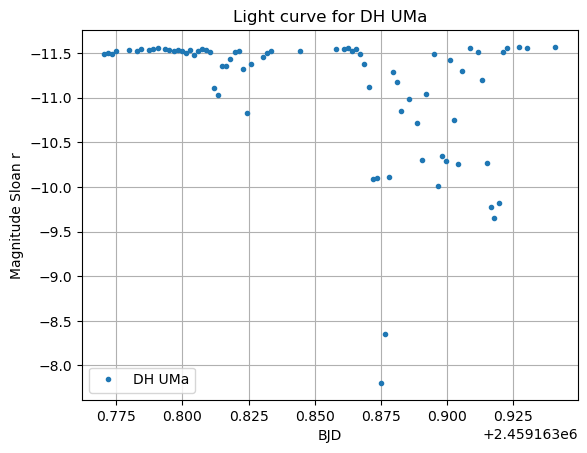

In [90]:
from matplotlib import pyplot as plt

plt.figure()  # Make a figure 
plt.plot(dh_uma_only['BJD'], dh_uma_only['mag_inst'], '.', label='DH UMa') # Plot some points
plt.ylim(reversed(plt.ylim()))  # Because magnitudes 

plt.grid() # Plots are useful with grids
plt.legend()
plt.xlabel('BJD')
plt.ylabel('Magnitude Sloan r')
plt.title('Light curve for DH UMa')

Turns out DH UMa is an irregular variable, so lets try plotting EY UMa instead. It is an RR Lyrae with a period of just under 0.55 days, so we should see some change in brightness.

In [91]:
ey_uma_only = ey_uma_data[ ey_uma_data['star_id'] == 1 ]

Text(0, 0.5, 'Magnitude Sloan r')

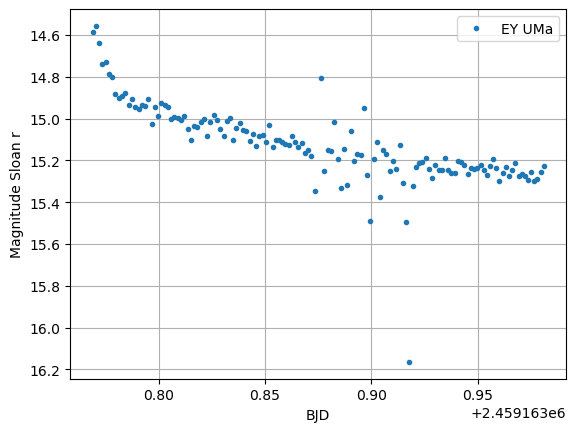

In [92]:
plt.figure()  # Make a figure 
plt.plot(ey_uma_only['BJD'], ey_uma_only['mag_inst_cal'], '.', label='EY UMa') # Plot some points
plt.ylim(reversed(plt.ylim()))  # Because magnitudes 

plt.grid() # Plots are useful with grids
plt.legend()
plt.xlabel('BJD')
plt.ylabel('Magnitude Sloan r')

## Astroquery example: getting data from a vizier catalog

[astroquery documentation](https://astroquery.readthedocs.io/en/latest/), which includes an extensive list of [services](https://astroquery.readthedocs.io/en/latest/#available-services), [catalogs, archives and other services](https://astroquery.readthedocs.io/en/latest/#catalog-archive-and-other). 

In [67]:
from astroquery.vizier import Vizier
from astropy import units as u

### Getting data from Vizier

[Vizier](https://vizier.cds.unistra.fr/viz-bin/VizieR) is an online catalog of catalogs. Since I don't know what type of variable DH UMa is, let's look at that star up in VSX using the copy of VSX at Vizier.

The catalog names below were obtained by looking apass and vsx in Vizier.

In [68]:
apass_name = 'II/336/apass9'
vsx_name = 'B/vsx/vsx'

Vizier.ROW_LIMIT = -1  # Set row_limit to have no limit
cat = Vizier.query_region(dh_uma,   # RA/Dec of center of search
                          radius=0.1 * u.degree,  # Radius of search, in degrees. 6 * u.arcmin would be equvalent
                          catalog=vsx_name)

In [70]:
dh_uma_vsx = cat[0]

In [71]:
dh_uma_vsx

OID,n_OID,Name,V,Type,l_max,max,u_max,n_max,f_min,l_min,min,u_min,n_min,l_Period,Period,u_Period,Sp,RAJ2000,DEJ2000
,,,,,,mag,,,,,mag,,,,d,,,deg,deg
int32,str1,str30,uint8,str30,str1,float32,str1,str8,str1,str1,float32,str1,str8,str1,float64,str1,str26,float64,float64
37235,B,DH UMa,0,LB:,,9.200,,V,Y,,0.240,,V,,--,,"C3,5J(R5)",135.81354,50.09428


So.....DH UMa is type `LB:`. Not sure what that is...

(someone looked it up and it is a type of irregular variable)

Now look up EY UMa

In [72]:
cat = Vizier.query_region(ey_uma, radius=0.1 * u.degree, catalog=vsx_name)

In [73]:
cat[0]

OID,n_OID,Name,V,Type,l_max,max,u_max,n_max,f_min,l_min,min,u_min,n_min,l_Period,Period,u_Period,Sp,RAJ2000,DEJ2000
,,,,,,mag,,,,,mag,,,,d,,,deg,deg
int32,str1,str30,uint8,str30,str1,float32,str1,str8,str1,str1,float32,str1,str8,str1,float64,str1,str26,float64,float64
37272,B,EY UMa,0,RRAB,,15.079,,CV,Y,,0.690,,CV,,0.549090000000,,,135.58650,49.81926


### astrometry.net

https://astroquery.readthedocs.io/en/latest/astrometry_net/astrometry_net.html

In [76]:
from astroquery.astrometry_net import AstrometryNet

In [77]:
ast = AstrometryNet()

You need to make an account on [astrometry.net](nova.astsrometry.net) to get an API key. If you aren't sharing your code with anyone it is fine to set the API like this -- I used a file below so that I wouldn't reveal my key to the world.

```python
api_key = 'dasfhfiufeh'
```

In [80]:
with open("secret") as f:
    api_key = f.read().strip()

In [81]:
ast.api_key = api_key
wcs_header = ast.solve_from_image('ey-uma-S001-R001-C037-rp.fit', force_image_upload=True)

Solving......................................................................................................

TimeoutError: ('Solve timed out without success or failure', 8561271)

Turns out the astrometry.net server was pretty overloaded on Saturday. The image did eventually solve.

## Links to some useful photometry software


+ [`photutils`](https://photutils.readthedocs.io/en/stable/) is the main Python photometry package based on astropy. Its extensive documentation is very detailed.

+ [`stellarphot`](https://stellarphot.readthedocs.io/en/latest/) is a more approachable package based on stellarphot. It contains code for doing things like differential photometry and relative flux. Unfortunately, its documentation are currently not so good. Look for an update in early November.

+ [`sep`](https://sep.readthedocs.io/en/v1.1.x/) is a python wrapper around the code for [SourceExtractor](https://www.astromatic.net/software/sextractor/). If you are looking for a drop-in replacement for [SourceExtractor](https://www.astromatic.net/software/sextractor/), this it. Note that [`photutils`](https://photutils.readthedocs.io/en/stable/) can do the same kind of photometry as [SourceExtractor](https://www.astromatic.net/software/sextractor/).


### I haven't tried these but they look interesting

+ [prose](https://prose.readthedocs.io/en/latest/)
